In [1]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis


In [2]:
#print("%0.2f" % X.instability_index())

In [3]:
#print("%0.2f" % X.gravy())

In [4]:
from Bio import SeqIO
record_dict = SeqIO.index("E:\\yuming\\2022\\20221110\\New_folder\\fragpipe2\\DD\\protein.fas", "fasta")

record_dd = list(SeqIO.parse("E:\\yuming\\2022\\20221110\\New_folder\\fragpipe2\\DD\\protein.fas", "fasta"))
record_np1 = list(SeqIO.parse("E:\\yuming\\2022\\20221110\\New_folder\\fragpipe2\\NP1\\protein.fas", "fasta"))
record_np2 = list(SeqIO.parse("E:\\yuming\\2022\\20221110\\New_folder\\fragpipe2\\NP2\\protein.fas", "fasta"))
record_np3 = list(SeqIO.parse("E:\\yuming\\2022\\20221110\\New_folder\\fragpipe2\\NP3\\protein.fas", "fasta"))
record_np4 = list(SeqIO.parse("E:\\yuming\\2022\\20221110\\New_folder\\fragpipe2\\NP4\\protein.fas", "fasta"))
record_np5 = list(SeqIO.parse("E:\\yuming\\2022\\20221110\\New_folder\\fragpipe2\\NP5\\protein.fas", "fasta"))





len(record_np1)

#print(record_dict.get_raw("gi|1348917|gb|G26685|G26685").decode())

302

In [5]:
record_dd[1].name.split('|')[1]

'A0A075B6H9'

In [31]:
record=record_dd
record[122].seq
 
#X = ProteinAnalysis(str(record[122].seq))
#X.gravy()

Seq('MWRSLGLALALCLLPSGGTESQDQSSLCKQPPAWSIRDQDPMLNSNGSVTVVAL...PSN')

In [34]:
len(record[121].seq)

699

In [35]:
X = ProteinAnalysis(str(record[121].seq))
X.isoelectric_point()

5.291278266906737

In [7]:
#X.gravy()

In [36]:
def get_gravy_values(record = record_dd):
    '''get Gravy values of a given protein sequence'''
    value = []
    for i in range(len(record)):
        try:
            X = ProteinAnalysis(str(record[i].seq))
            value.append(X.gravy())
        except Exception as e:  # Catch all exceptions (better to specify the exact one if known)
                #print(f"An error occurred with item {i}: {e}. But we're continuing.")
                continue
    return(value)
def get_IP_values(record = record_dd):
    '''get isoelectric_point of a given protein sequence'''
    value = []

    for i in range(len(record)):
        try:
            X = ProteinAnalysis(str(record[i].seq))
            value.append(X.isoelectric_point())
        except Exception as e:  # Catch all exceptions (better to specify the exact one if known)
                #print(f"An error occurred with item {i}: {e}. But we're continuing.")
                continue
    return(value)

In [37]:
get_IP_values(record = record_np2)

[6.997527885437012,
 5.438604927062988,
 5.386199378967285,
 5.086544227600096,
 9.128481483459474,
 10.12509822845459,
 5.582578086853027,
 5.596901512145995,
 9.486925697326662,
 9.493308067321777,
 5.035559654235839,
 6.1720552444458,
 5.30395336151123,
 5.659822273254394,
 5.1375856399536115,
 5.438491249084472,
 5.685229301452637,
 5.636802482604979,
 5.824655342102051,
 5.337374687194824,
 5.680739021301269,
 7.6464017868042,
 8.035742378234861,
 6.667293357849122,
 6.321030235290528,
 5.327825736999511,
 5.682159996032715,
 9.000898551940917,
 6.335183143615722,
 9.497691917419434,
 5.115532112121582,
 6.690540504455567,
 6.111578559875488,
 8.462071800231932,
 8.230372428894043,
 6.34694881439209,
 5.555522727966308,
 5.645612525939941,
 6.269534111022949,
 8.010341835021975,
 4.72192211151123,
 5.22932376861572,
 5.695573997497559,
 5.367556190490721,
 5.451677894592284,
 9.25774059295654,
 8.831282234191896,
 8.6143461227417,
 5.426896095275878,
 8.34003314971924,
 5.31515064

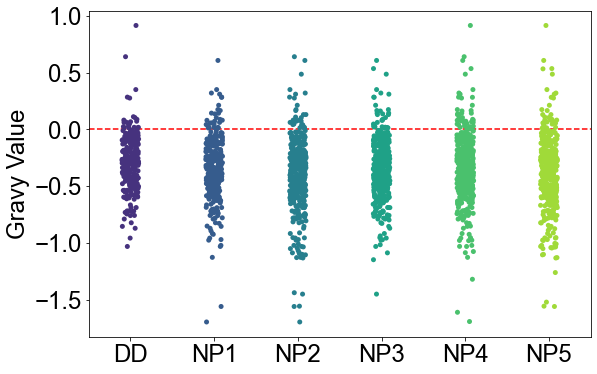

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(9, 6), edgecolor='#04253a')
# Convert the lists to a single DataFrame
data = {
    'DD': get_gravy_values(record = record_dd),
    'NP1': get_gravy_values(record = record_np1),
    'NP2': get_gravy_values(record = record_np2),
    'NP3': get_gravy_values(record = record_np3),
    'NP4': get_gravy_values(record = record_np4),
    'NP5': get_gravy_values(record = record_np5),
}

# Convert the dict to a list of tuples, then to a DataFrame
long_data = [(key, val) for key, values in data.items() for val in values]
df_gravy = pd.DataFrame(long_data, columns=["list", "value"])

# Plotting the strip plot
sns.stripplot(x="list", y="value", data=df_gravy,palette='viridis',jitter=True)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('')
plt.ylabel("Gravy Value",fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

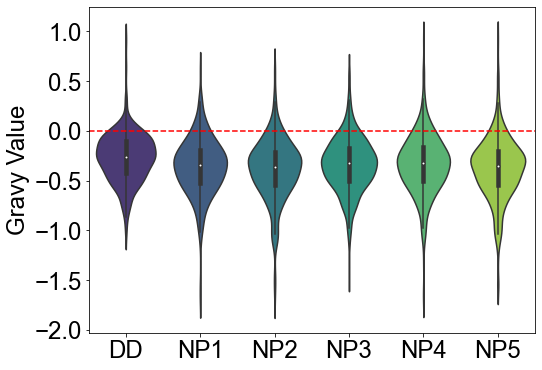

In [51]:
# Plotting the strip plot

plt.figure(figsize=(8, 6), edgecolor='#04253a')
sns.violinplot(x="list", y="value", data=df_gravy,palette='viridis',jitter=True)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('')
plt.ylabel("Gravy Value",fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

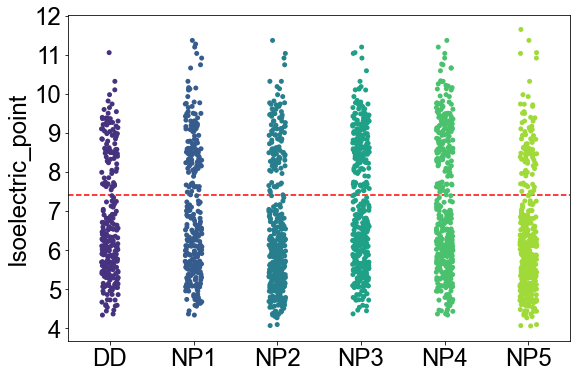

In [48]:
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(9, 6), edgecolor='#04253a')
# Convert the lists to a single DataFrame
data = {
    'DD': get_IP_values(record = record_dd),
    'NP1': get_IP_values(record = record_np1),
    'NP2': get_IP_values(record = record_np2),
    'NP3': get_IP_values(record = record_np3),
    'NP4': get_IP_values(record = record_np4),
    'NP5': get_IP_values(record = record_np5),
}

# Convert the dict to a list of tuples, then to a DataFrame
long_data = [(key, val) for key, values in data.items() for val in values]
df_ip = pd.DataFrame(long_data, columns=["list", "value"])

# Plotting the strip plot
sns.stripplot(x="list", y="value", data=df_ip,palette='viridis',jitter=True)
plt.axhline(y=7.4, color='red', linestyle='--')
plt.xlabel('')
plt.ylabel("Isoelectric_point",fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

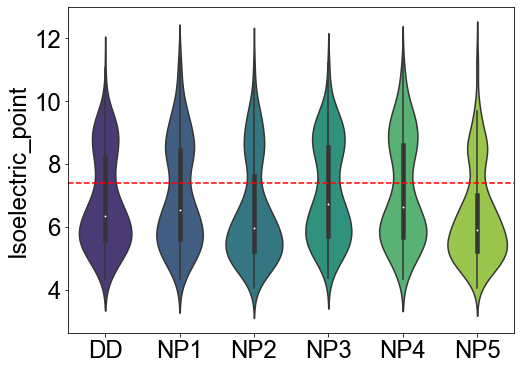

In [52]:
plt.figure(figsize=(8, 6), edgecolor='#04253a')

# Plotting the strip plot
sns.violinplot(x="list", y="value", data=df_ip,palette='viridis',jitter=True)
plt.axhline(y=7.4, color='red', linestyle='--')
plt.xlabel('')
plt.ylabel("Isoelectric_point",fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

In [16]:
[len(get_gravy_values(record = record_dd)),
len([item for item in get_gravy_values(record = record_dd) if item>0])]

[267, 23]

In [17]:
[len(get_gravy_values(record = record_np1)),
len([item for item in get_gravy_values(record = record_np1) if item>0])]

[300, 28]

In [18]:
[len(get_gravy_values(record = record_np2)),
len([item for item in get_gravy_values(record = record_np2) if item>0])]

[418, 31]

In [19]:
[len(get_gravy_values(record = record_np3)),
len([item for item in get_gravy_values(record = record_np3) if item>0])]

[402, 34]

In [20]:
[len(get_gravy_values(record = record_np4)),
len([item for item in get_gravy_values(record = record_np4) if item>0])]

[415, 43]

In [21]:
[len(get_gravy_values(record = record_np5)),
len([item for item in get_gravy_values(record = record_np5) if item>0])]

[434, 32]

In [14]:
#print(record_dict["sp|A0A075B6H9|LV469_HUMAN"].format("fasta"))

In [13]:
from Bio import SeqIO
filename = "E:\\yuming\\2022\\20221110\\New_folder\\fragpipe2\\DD\\protein.fas"
for record in SeqIO.parse(filename, "fasta"):
    print("ID %s" % record.id)
    print("Sequence length %i" % len(record))
    print("Sequence alphabet %s" % record.seq)

ID contam_sp|P00761|TRYP_PIG
Sequence length 231
Sequence alphabet FPTDDDDKIVGGYTCAANSIPYQVSLNSGSHFCGGSLINSQWVVSAAHCYKSRIQVRLGEHNIDVLEGNEQFINAAKIITHPNFNGNTLDNDIMLIKLSSPATLNSRVATVSLPRSCAAAGTECLISGWGNTKSSGSSYPSLLQCLKAPVLSDSSCKSSYPGQITGNMICVGFLEGGKDSCQGDSGGPVVCNGQLQGIVSWGYGCAQKNKPGVYTKVCNYVNWIQQTIAAN
ID sp|A0A075B6H9|LV469_HUMAN
Sequence length 119
Sequence alphabet MAWTPLLFLTLLLHCTGSLSQLVLTQSPSASASLGASVKLTCTLSSGHSSYAIAWHQQQPEKGPRYLMKLNSDGSHSKGDGIPDRFSGSSSGAERYLTISSLQSEDEADYYCQTWGTGI
ID sp|A0A075B6I0|LV861_HUMAN
Sequence length 122
Sequence alphabet MSVPTMAWMMLLLGLLAYGSGVDSQTVVTQEPSFSVSPGGTVTLTCGLSSGSVSTSYYPSWYQQTPGQAPRTLIYSTNTRSSGVPDRFSGSILGNKAALTITGAQADDESDYYCVLYMGSGI
ID sp|A0A075B6J9|LV218_HUMAN
Sequence length 118
Sequence alphabet MAWALLLLTLLTQGTGSWAQSALTQPPSVSGSPGQSVTISCTGTSSDVGSYNRVSWYQQPPGTAPKLMIYEVSNRPSGVPDRFSGSKSGNTASLTISGLQAEDEADYYCSLYTSSSTF
ID sp|A0A075B6R9|KVD24_HUMAN
Sequence length 120
Sequence alphabet MRLLAQLLGLLMLWVPGSSGDIVMTQTPLSSPVTLGQPASISFRSSQSLVHSDGNTYLSWLQQRPGQPPRL

In [ ]:
#[record_dd[i].name.split('|')[1] for i in range(len(record_dd))]

# plot Venn diagram between scouting DISPA methods and LC results 

In [32]:
record_dd[4].name

'sp|A0A075B6R9|KVD24_HUMAN'

In [6]:
list_dd = [record_dd[i].name.split('|')[1] for i in range(len(record_dd))]
list1 = [record_np1[i].name.split('|')[1] for i in range(len(record_np1))]
list2 = [record_np2[i].name.split('|')[1] for i in range(len(record_np2))]
list3 = [record_np3[i].name.split('|')[1] for i in range(len(record_np3))]
list4 = [record_np4[i].name.split('|')[1] for i in range(len(record_np4))]
list5 = [record_np5[i].name.split('|')[1] for i in range(len(record_np5))]

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas as pd
import venn

In [8]:
lc_all=list_dd+list1+list2+list3+list4+list5
len(lc_all)

2250

In [9]:
sample=[0,2,3,4]
def remove_dul(tar_list=sample):
    res=[]
    [res.append(x) for x in tar_list if x not in res]
    return(res)

In [10]:
len(remove_dul(tar_list=lc_all))

776

In [33]:
# import the scouting DISPA results here 

dfdf=pd.read_excel(r'F:\\Seer_project\\NPs_scout.xlsx',sheet_name='Sheet1')
dfdf.set_index('Unnamed: 0',inplace=True)
#dfdf


In [34]:
dfdf

,DD,NP1,NP2,NP3,NP4,NP5,pro_names,new_index,old_index,Biomarkers
Unnamed: 0,,,,,,,,,,
THRB,NaN,NaN,4.917836,4.349819,NaN,5.900115,P00734,THRB,1/DECOY_0_sp|P00734|THRB_HUMAN,no
CO3,NaN,3.790649,NaN,NaN,NaN,NaN,P01024,CO3,1/DECOY_0_sp|P01024|CO3_HUMAN,yes
APOA1,NaN,NaN,NaN,NaN,4.194894,NaN,P02647,APOA1,1/DECOY_0_sp|P02647|APOA1_HUMAN,yes
FIBA,NaN,NaN,3.907626,NaN,NaN,NaN,P02671,FIBA,1/DECOY_0_sp|P02671|FIBA_HUMAN,yes
LV743,NaN,NaN,NaN,NaN,NaN,3.732767,P04211,LV743,1/DECOY_0_sp|P04211|LV743_HUMAN,no
...,...,...,...,...,...,...,...,...,...,...
HV321,5.119214,NaN,NaN,4.608127,4.738867,4.209833,P0DP04,HV321,9/sp|P0DP04|HV43D_HUMAN/sp|P01782|HV309_HUMAN/...,no
HV404,4.653399,3.842820,NaN,4.709690,4.609838,NaN,P0DP08,HV404,9/sp|P0DP08|HVD82_HUMAN/sp|P0DP07|HV431_HUMAN/...,no
H2B1K,NaN,4.388111,4.377766,NaN,4.323882,NaN,Q99880,H2B1K,9/sp|Q99880|H2B1L_HUMAN/sp|Q99879|H2B1M_HUMAN/...,no


In [45]:
# try to find out all uniprot IDs for all potential protein IDs

import re
nillist=[]
pattern = r'sp\|(\w{6})'
for item in dfdf['old_index'].tolist():
    matches = re.findall(pattern, item)
    nillist.append(matches)
flatted=[item for sublist in nillist for item in sublist]
len(flatted)

1299

In [26]:
#dfdf['pro_names'].tolist()

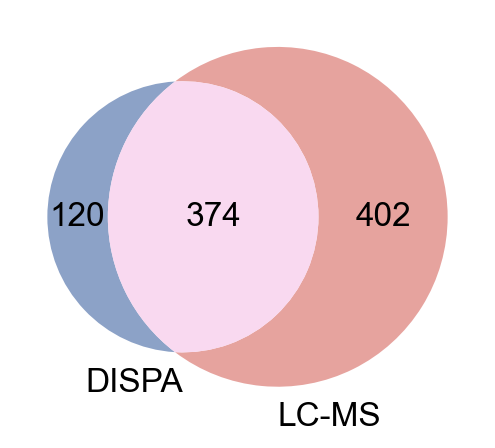

In [53]:
# plot venn diagram

from matplotlib_venn import venn2
matplotlib.rcParams['font.family'] = "Arial"
my_dpi=150
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)#控制图尺寸的同时，使图高分辨率（高清）显示

out=venn2(subsets =[set(dfdf['pro_names'].tolist()), set(remove_dul(tar_list=lc_all))], 
      set_labels =('DISPA', 'LC-MS'),set_colors=('#8098C1', '#E49994'),
      alpha=0.9,
      normalize_to=1)
for text in out.set_labels:
    text.set_fontsize(16)
for text in out.subset_labels:
    text.set_fontsize(16)
    text.set_color('black')
fig_path= 'F:\\Seer_project\\figures\\' 
figname='venn_scout_lc'
plt.savefig(fig_path + "%s.svg" % figname,dpi=800, bbox_inches='tight')  
plt.show()

In [54]:
list33=[item for item in dfdf['pro_names'].tolist() if item not in remove_dul(tar_list=lc_all)]
list44=[item for item in remove_dul(tar_list=lc_all) if item not in dfdf['pro_names'].tolist()]
list55=[item for item in dfdf['pro_names'].tolist() if item in remove_dul(tar_list=lc_all)]

In [58]:
len(remove_dul(list33))

120

In [60]:
# Calculate max length and fill with NaN if necessary
list11=remove_dul(tar_list=lc_all)
list22=dfdf['pro_names'].tolist()
list333=remove_dul(list33)
list444=remove_dul(list44)
list555=remove_dul(list55)


max_len = max(len(list11), len(list22), len(list333), len(list444), len(list555))
list11 = list11 + [None]*(max_len - len(list11))
list22 = list22 + [None]*(max_len - len(list22))
list333 = list333 + [None]*(max_len - len(list333))
list444 = list444 + [None]*(max_len - len(list444))
list555 = list555 + [None]*(max_len - len(list555))
df = pd.DataFrame({
    'LC': list11,
    'DISPA': list22,
    'shared':list555,
    'dispa_only':list333,
    'LC_only':list444
})

df

,LC,DISPA,shared,dispa_only,LC_only
0,P00761,P00734,P00734,P04211,A0A075B6H9
1,A0A075B6H9,P01024,P01024,A0A0B4J1Y8,A0A075B6J9
2,A0A075B6I0,P02647,P02647,O15195,A0A075B6R9
3,A0A075B6J9,P02671,P02671,O60231,A0A0B4J1V2
4,A0A075B6R9,P04211,P06681,O75150,A0A0C4DH72
...,...,...,...,...,...
771,A0A075B6S5,None,None,None,None
772,Q96HR3,None,None,None,None
773,Q5JRA6,None,None,None,None
774,Q04637,None,None,None,None


In [62]:
df.to_excel(r'F:\\Seer_project\\scout_LC.xlsx')

In [46]:
#df.to_csv(r'F:\\Seer_project\\scout_LC.txt')